# MicroFit
A small, pure Python library for fitting MicroBooNE data.

## Prerequisites

Follow these instructions to set up the Conda environment: https://github.com/ubneutrinos/searchingfornues/wiki/CONDA-setup-for-python3 . Some additional packages may be needed that can be installed with `conda install` or `pip install` as needed.
You will need a file `localSettings.py` in the root directory of this repository that defines the root directory where all the data lives that at least contains:
```python
ntuple_path = '/path/to/ntuples'
```

Further, you will need to make sure that all the data files you want to load are listed in `data_paths.yml`.

## Loading Data
You can load any number of runs with any selection of truth-filtered data sets using the `load_runs` function defined in `data_loading.py`. With caching enabled, individual dataframes will be stored to disk for faster loading in the future. The first variable returned by the function is a dictionary where the keys are the names of the datasets and the values are the corresponding dataframes. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
from data_loading import load_runs

RUN = ["1"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1


In [3]:
rundata.keys()

dict_keys(['data', 'ext', 'mc', 'nue', 'drt', 'lee'])

In [4]:
rundata["mc"]

,shr_energy_cali,reco_nu_vtx_x,pi0_energy1_Y,pi0_shrscore2,tksh_angle,shr_dedx_V,shr_tkfit_gap10_nhits_U,pi0_dedx2_fit_U,true_nu_vtx_sce_y,reco_nu_vtx_sce_z,...,dy,dz,dr,paper_category,paper_category_xsec,paper_category_numu,category_1e1p,dataset,weights,weights_no_tune
entry,,,,,,,,,,,,,,,,,,,,,
0,0.070186,42.718864,-1.000000,-1.000000,-2.920805e-01,0.784295,9,1.540691e+00,2.175370,350.755676,...,-0.155454,-0.143097,0.211768,2,2,2,2,mc,0.130186,0.130186
1,0.128566,104.414253,-1.000000,-1.000000,-3.946708e-01,1.015840,5,7.787718e+00,78.768028,327.177795,...,0.090927,0.135254,0.170766,2,2,2,12,mc,0.130186,0.130186
2,0.469105,50.764412,480.555328,0.661971,5.691397e-01,2.929878,0,6.842929e+00,16.194977,283.220398,...,-0.155703,-0.838928,0.853762,31,31,2,12,mc,0.130186,0.130186
3,0.367364,125.316795,-1.000000,-1.000000,2.605618e-01,0.310502,1,6.842929e+00,35.631496,83.724838,...,0.597797,0.057831,0.681040,31,31,2,21,mc,0.130186,0.130186
4,0.287401,87.914200,284.861694,0.767545,-8.628162e-01,0.031563,0,6.842929e+00,59.262199,491.492310,...,1.125980,-1.834167,2.179828,2,2,2,13,mc,0.130186,0.130186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31449,0.137862,42.975651,-1.000000,-1.000000,9.381216e-01,4.734364,3,1.451400e+00,-85.596649,420.278229,...,-0.203354,0.005127,0.217784,31,31,2,12,mc,0.130186,0.130186
31450,0.103502,126.448318,-1.000000,-1.000000,-3.402823e+38,3.468341,12,8.120677e-10,-162.793091,478.761139,...,254.107513,172.795624,308.342957,2,2,2,12,mc,0.161050,0.129699
31451,0.147371,51.625362,-1.000000,-1.000000,-3.402823e+38,4.922271,7,1.185750e+01,-12.939268,446.482269,...,6.810709,1.183167,9.248138,31,31,2,13,mc,0.130186,0.130186


The dataframes have already been concatenated over the runs and are weighted such that the total norm should match that of the data. The weights are stored in the `weights` column. We can use it to make a simple histogram even without the rest of the framework. Also, events for which truth-filtered sets have been loaded are already removed from the "mc" set, so there is no need to worry about double-counting of events. When we plot the stacked histogram of all MC and EXT on top of the data, we should see a good agreement.

['ext', 'nue', 'drt', 'mc']


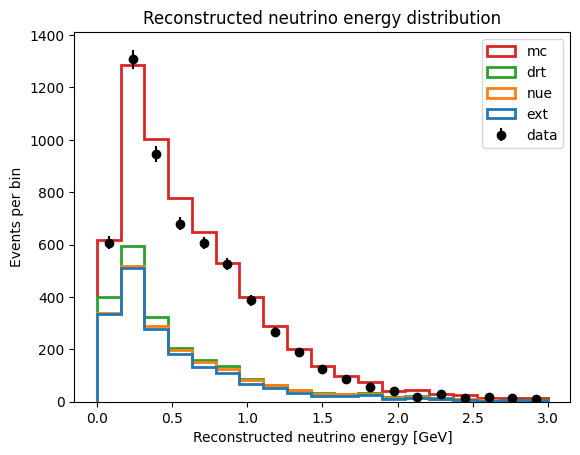

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of reconstructed neutrino energy (`reco_e`).
# We have to set the binning manually because sometimes a filler value is used
# that is a very large number. To get the total predicted number of events,
# we have to add all MC sets and the EXT data set.

bins = np.linspace(0, 3, 20)
background_keys = list(set(rundata.keys()) - set(["data", "lee"]))
print(background_keys)
plt.hist(
    [rundata[key]["reco_e"] for key in background_keys],
    bins=bins,
    weights=[rundata[key]["weights"] for key in background_keys],
    histtype="step",
    lw=2,
    stacked=True,
    label=[key for key in background_keys],
)
# show data hist on top as points with error bars
data_bin_content, data_bin_edges = np.histogram(
    rundata["data"]["reco_e"], bins=bins, weights=rundata["data"]["weights"]
)
data_bin_errors = np.sqrt(data_bin_content)
data_bin_centers = (data_bin_edges[:-1] + data_bin_edges[1:]) / 2
plt.errorbar(
    data_bin_centers,
    data_bin_content,
    yerr=data_bin_errors,
    fmt="o",
    label="data",
    color="black",
)
plt.legend()
plt.xlabel("Reconstructed neutrino energy [GeV]")
plt.ylabel("Events per bin")
plt.title("Reconstructed neutrino energy distribution")
plt.show()

## The RunHistGenerator

The `RunHistGenerator` class is defined in `histogram.py` and is mainly responsible for making histograms of full runs with annotated event categories. Most importantly, this class also handles the calculation of the systematic uncertainties as a covariance matrix using "multisim" and "unisim" weights.

In [6]:
from microfit.histogram import Binning, Histogram, RunHistGenerator

# The query strings for the selection are defined in the `selections.py` file.
selection = "NPBDT"
preselection = "NP"
# Binnings are defined by the variable to be binned, the number of bins, and the range, and the label.
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")
binning = Binning.from_config(*binning_def)
binning.label = "NPBDT"  # a unique label to identify the channel later
# The binning is a class with a defined repr:
binning

Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='NPBDT', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None)

In [7]:
signal_generator = RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
)

The objects returned by the `RunHistGenerator` are of type `Histogram`. This class not only stored bin counts, but also the associated covariance matrices and simplifies arithmatic with histograms. For example, we can add or multiply two histograms together and the covariance will be appropriately propagated automatically. The `Histogram` class also has a `plot` method that can be used to plot the histogram with error bands.

Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='NPBDT', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key='NPBDT', preselection_key='NP', selection_tex='1eNp BDT sel.'), bin_counts=[0.6480687652616443+/-1.0414316638858991
 2.308074229773891+/-0.46002897312225816
 2.8567978438662167+/-0.49878876474284944
 3.0180154554032637+/-0.5188425609048453
 2.1492758021520793+/-0.3411374260232986
 2.8127763969767106+/-0.5229679970130083
 1.8041196446169803+/-0.3997586314353934
 1.3303665687910868+/-0.24674726214916598
 1.1532703915036642+/-0.20410994112866138
 0.9708984939596732+/-0.17633716315140352], label=MC+EXT, tex=MC+EXT)

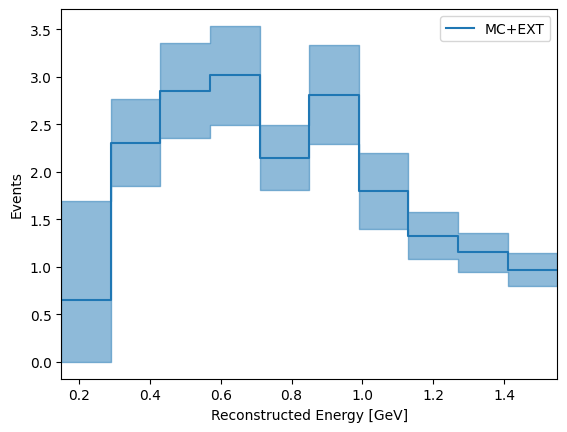

In [8]:
total_prediction = signal_generator.get_total_prediction(include_multisim_errors=True)
# The `Histogram` class also defines a repr that makes a nice plot when run inside a Jupyter notebook:
total_prediction

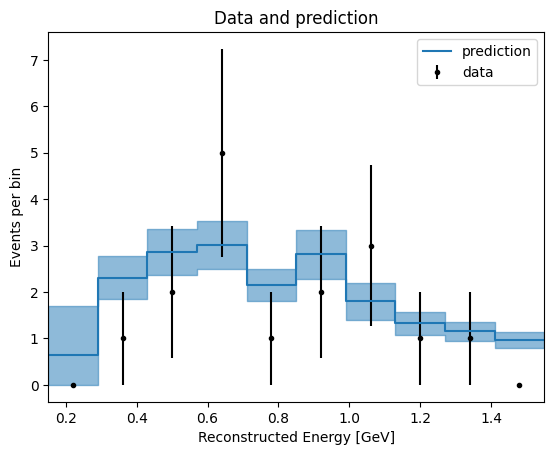

In [9]:
data_hist = signal_generator.get_data_hist()
fig, ax = plt.subplots()
data_hist.draw(ax=ax, label="data", as_errorbars=True)
total_prediction.draw(ax=ax, label="prediction", as_errorbars=False)
ax.legend()
ax.set_xlabel(binning.variable_tex)
ax.set_ylabel("Events per bin")
ax.set_title("Data and prediction")
plt.show()

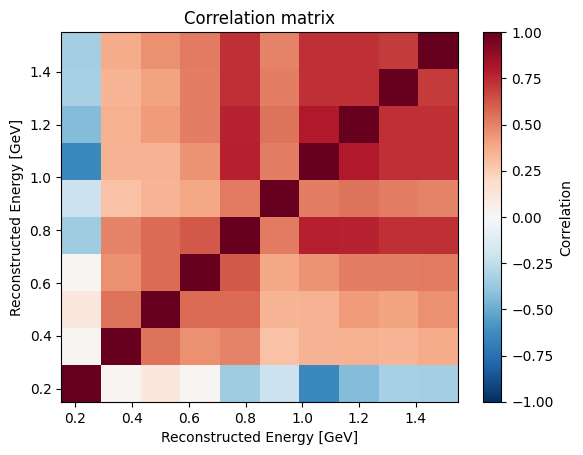

In [10]:
# We can also ask it to draw the covariance matrix
fig, ax = plt.subplots()
total_prediction.draw_covariance_matrix(ax=ax)
plt.show()

Histograms can also be divided to calculate the ratio. The covariance will be correctly propagated. 

/nashome/a/atrettin/PELEE/microfit/statistics.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  Cy[i, i] = y[i] ** 2 * (C1[i, i] / x1[i] ** 2 + C2[i, i] / x2[i] ** 2)
/nashome/a/atrettin/PELEE/microfit/statistics.py:415: RuntimeWarning: invalid value encountered in double_scalars
  Cy[i, i] = y[i] ** 2 * (C1[i, i] / x1[i] ** 2 + C2[i, i] / x2[i] ** 2)
/nashome/a/atrettin/PELEE/microfit/statistics.py:418: RuntimeWarning: invalid value encountered in double_scalars
  Cy[i, j] = y[i] * y[j] * (C1[i, j] / (x1[i] * x1[j]) + C2[i, j] / (x2[i] * x2[j]))


<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

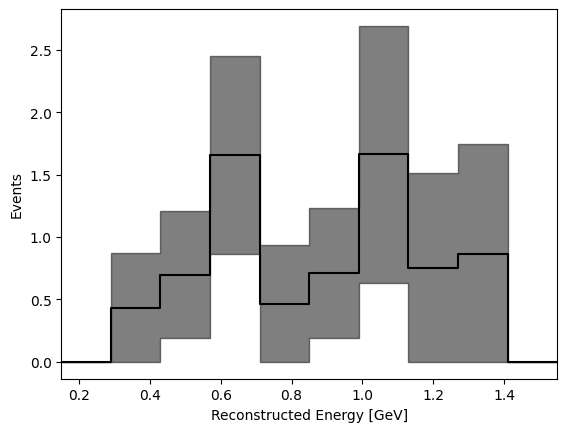

In [11]:
data_mc_ratio = data_hist / total_prediction
fig, ax = plt.subplots()
data_mc_ratio.draw(ax=ax, label="data / prediction", as_errorbars=False)

## The RunHistPlotter

A more convent way to plot the histograms generated by the `RunHistGenerator` is to use the `RunHistPlotter` class defined in `run_plotter.py`.

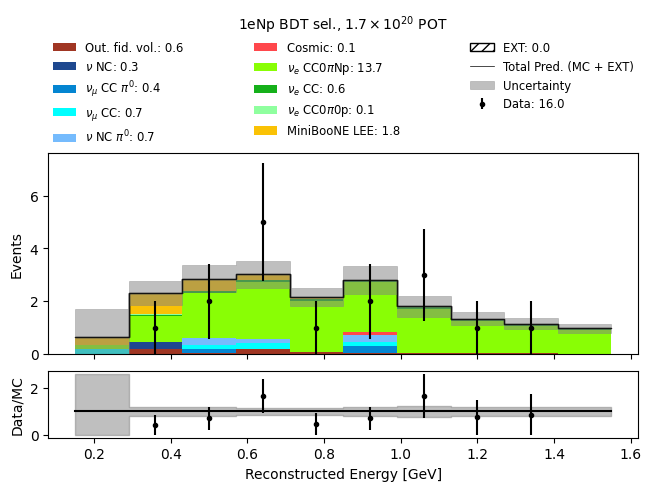

In [12]:
from microfit.run_plotter import RunHistPlotter

plotter = RunHistPlotter(signal_generator)
# The category column can be used to split the prediction into different categories.
# Predefined categories are "category", "paper_category", "paper_category_xsec" and "category_1e1p".
# New categories can be added by adding a corresponding column to the dataframe and then define
# the labels in the file `category_definitions.py`.
ax = plotter.plot(
    category_column="category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    show_data_mc_ratio=True,
)

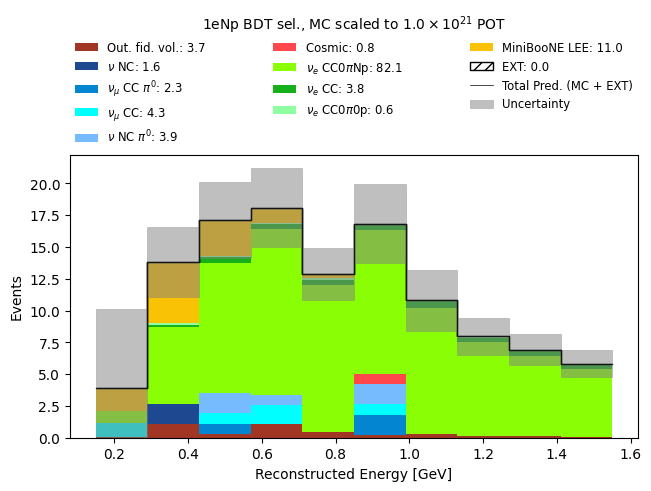

In [13]:
# We can also choose to rescale the data to any given POT.
# In that case, no data is shown.
ax = plotter.plot(
    category_column="category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    scale_to_pot=1e21,
)

## Adding a sideband constraint

The framework supports the use of _one_ sideband measurement that can be used to constrain several signal bands simultaneously. To do so, simply add the `RunHistGenerator` for the sideband as an argument to the `RunHistGenerator` of the signal.

### Deprecation Notice

This method of adding a sideband generator to implement the constraint is deprecated! The new way to do this is to instantiate a `MultiBandAnalysis` as shown below and to set the constraint channels to be used there. The `MultiBandAnalysis` can handle any number of signal or sidebands.

In [14]:
# First, we need to load the sideband data. We use the numu sideband.
RUN = ["3"]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="opendata_bnb",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=False,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3


In [15]:
# note that the sideband is binned by a different variable
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_binning.label = "NUMU"  # a unique label to identify the channel later
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMU",
    preselection="NUMU",
)
sideband_plotter = RunHistPlotter(sideband_generator)

(<AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Events'>,
 None)

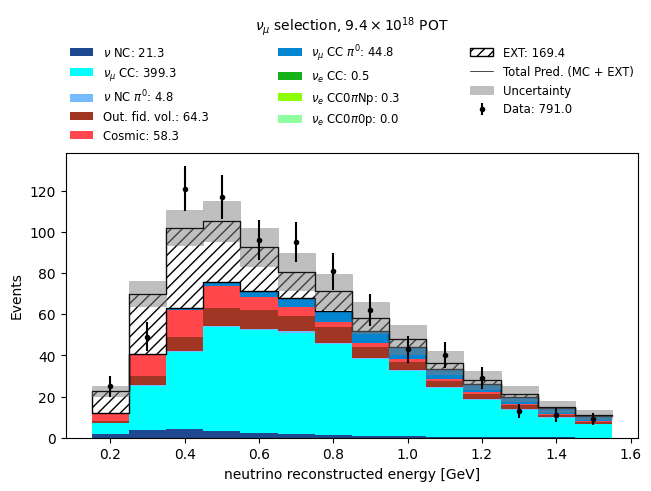

In [16]:
sideband_plotter.plot(include_multisim_errors=True, add_ext_error_floor=False, category_column="category")

We can see from the histogram that the data flux is a bit higher than the prediction. We will see that the correction due to the presence of the sideband will also increase the predicted bin count in the signal region. The total histogram, shown as the black line, no longer coincides with the stacked histogram because only it includes the sideband correction.

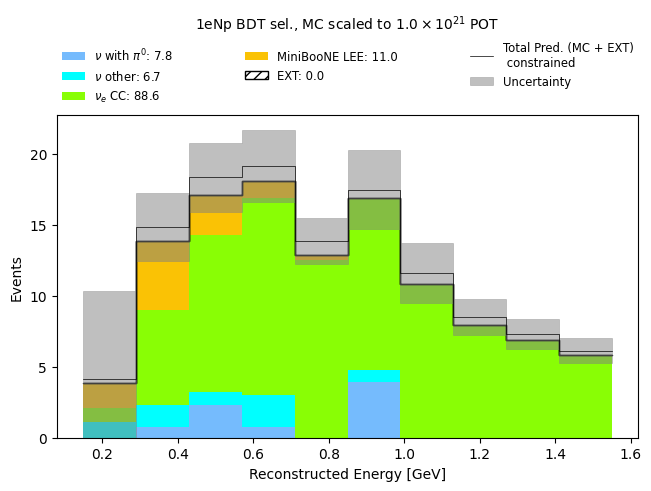

In [17]:
signal_generator = RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=sideband_generator,
)
signal_plotter = RunHistPlotter(signal_generator)
ax = signal_plotter.plot(
    include_multisim_errors=True,
    add_ext_error_floor=False,
    use_sideband=True,
    category_column="paper_category",
    scale_to_pot=1e21,
)

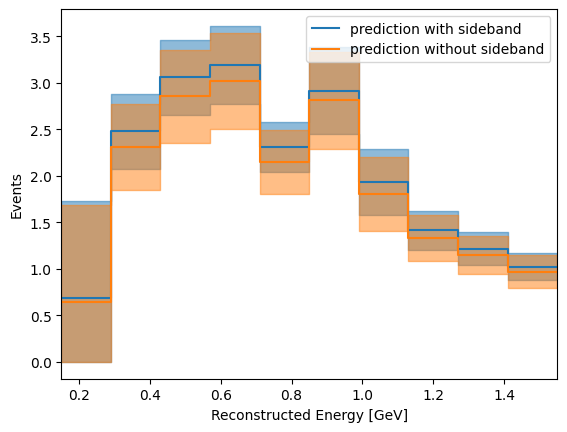

In [18]:
# show the total prediction with and without the sideband in the same plot.
# The predicted values are a bit higher but the size of the errors is also reduced.
total_prediction_with_sideband = signal_generator.get_total_prediction(
    include_multisim_errors=True, use_sideband=True
)
fig, ax = plt.subplots()
total_prediction_with_sideband.draw(
    ax=ax, label="prediction with sideband", as_errorbars=False
)
total_prediction.draw(ax=ax, label="prediction without sideband", as_errorbars=False)
ax.legend()

### 

### Introducing parameters

To eventually run an analysis, we have to be able to generate histograms under differen hypotheses. This is done by replacing the object that calculates the histograms with one that can be configured with parameters. When the `RunHistGenerator` is initialized, we can pass a sub-class of the default `HistogramGenerator` (also defined in `histogram.py`).

For the case of the LEE analysis, we can use a pre-defined class called `SignalOverBackgroundGenerator`, which accepts a `signal_strength` parameter. It also accepts two additional keyword arguments for the `signal_query` and the `background_query`. Internally, this generator uses the queries to generate signal and background histograms separately. Then, it adds the signal multiplied by the `signal_strength` to the background.

In [19]:
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.parameters import Parameter, ParameterSet

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

signal_generator = RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    # sideband_generator=sideband_generator,  # the sideband generator can be used here as well
    # This overrides the default `HistogramGenerator` class, which just produces 
    # a histogram without any parametrization.
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
    signal_query="category == 111",
    background_query="category != 111",
)
signal_plotter = RunHistPlotter(signal_generator)

(<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>, None)

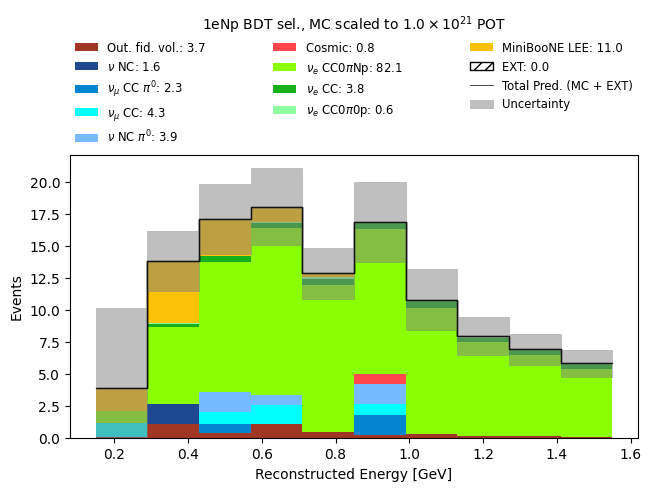

In [20]:
# The ParameterSet defines a set of parameters that may be used by several signal generators at once. 
signal_plotter.plot(include_multisim_errors=True, add_ext_error_floor=False, category_column="category", scale_to_pot=1e21)

#### Manipulating parameters

When manipulating parameters, be sure to alway set the _value_ and not replace the actual parameter object! This is necessary because parameters may be shared _by reference_ between different `RunHistGenerator` objects to synchronize parameters between signals.

In [21]:
signal_generator.parameters["signal_strength"].value = 5.0

(<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>, None)

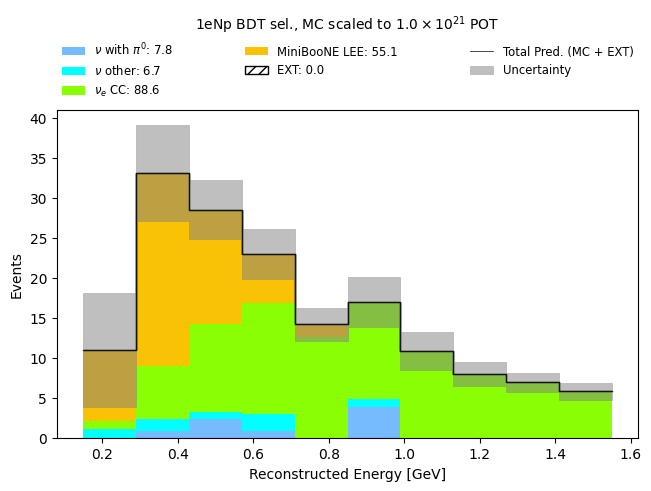

In [22]:
# The change in signal strength is reflected in the plot.
signal_plotter.plot(include_multisim_errors=True, add_ext_error_floor=False, category_column="paper_category", scale_to_pot=1e21)

### Parameter sharing

Parameters can be shared by reference between different signal generators.

In [23]:
second_binning = binning.copy()
second_binning.label = "ZPBDT"  # a unique label to identify the channel later

second_signal_generator = RunHistGenerator(
    rundata,
    second_binning,
    data_pot=data_pot,
    selection="ZPBDT",
    preselection="ZP",
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)
second_signal_plotter = RunHistPlotter(second_signal_generator)

(<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>, None)

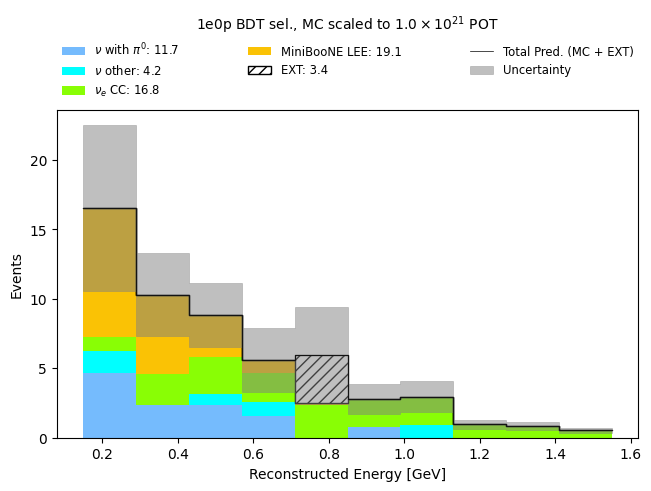

In [24]:
second_signal_plotter.plot(include_multisim_errors=True, add_ext_error_floor=False, category_column="paper_category", scale_to_pot=1e21)

In [25]:
# we can show that the actual parameter objects are the same
print(signal_generator.parameters is second_signal_generator.parameters)

True


(<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>, None)

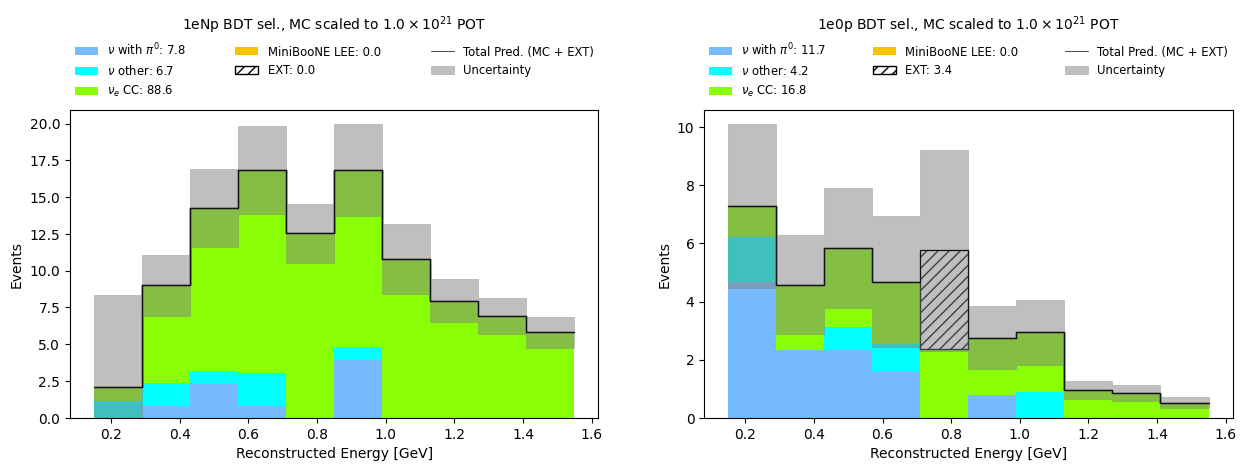

In [26]:
# When we set the parameter to zero in one, the signal disappears in both.
signal_generator.parameters["signal_strength"].value = 0.0
# make two axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
signal_plotter.plot(
    ax=ax1,
    include_multisim_errors=True,
    add_ext_error_floor=False,
    category_column="paper_category",
    scale_to_pot=1e21,
)
second_signal_plotter.plot(
    ax=ax2,
    include_multisim_errors=True,
    add_ext_error_floor=False,
    category_column="paper_category",
    scale_to_pot=1e21,
)

## Defining an Analysis

The `MultiBandAnalysis` class defined in `analysis.py` is a convenience class that defines an analysis with multiple signal bands. It can calculate the full multiband covariance matrix with and can calculate the chi-square between the data and the prediction. Any channel that has data can be used as a constraint channel, and any number of constraint channels are supported.

The class is meant to be used with a TOML file that defines how data is loaded, which selection and which binning to use in every sideband and what parameters to fit. Here, we will initialize it from the already prepared RunHistGenerator objects.

In [27]:
from microfit.analysis import MultibandAnalysis

# At this point, the "label" properties that we have assigend to the binnings are used to
# identify the channels. The analysis generates a multi-channel histogram with the
# appropriate correlations between bins. Then, sideband constraints can be applied to
# the signal channels.
analysis = MultibandAnalysis(run_hist_generators=[sideband_generator, signal_generator, second_signal_generator], constraint_channels=["NUMU"], signal_channels=["NPBDT", "ZPBDT"])

In [28]:
analysis.channels

['NUMU', 'NPBDT', 'ZPBDT']

In [29]:
analysis.signal_channels

['NPBDT', 'ZPBDT']

The analysis class internally combines the histograms produced by the different run hist generators into a multi-channel histogram. These multi-channel histograms keep track of the correlations between all the different channels.

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

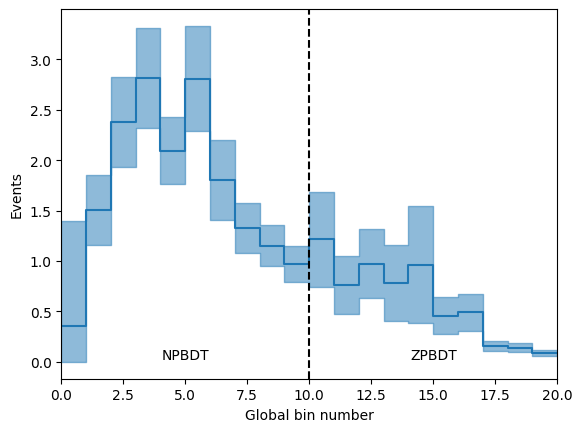

In [30]:
histogram_no_constraint = analysis.generate_multiband_histogram(
    include_multisim_errors=True
)
histogram_with_constraint = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True
)

# This is a multi-channel histogram of the MC prediction *before* the application of the sideband constraint
histogram_no_constraint.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

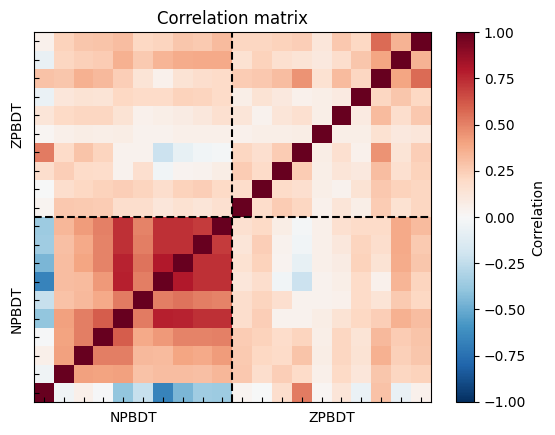

In [31]:
# The histogram contains the full covariance matrix between all channels.
histogram_no_constraint.draw_covariance_matrix()

<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

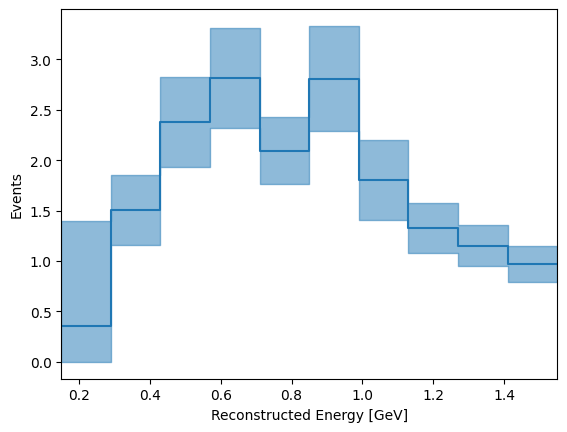

In [32]:
# We can extract channels from the multi-channel histogram by indices or by label.
histogram_no_constraint["NPBDT"].draw()

<AxesSubplot:title={'center':'Correlation matrix'}, xlabel='Reconstructed Energy [GeV]', ylabel='Reconstructed Energy [GeV]'>

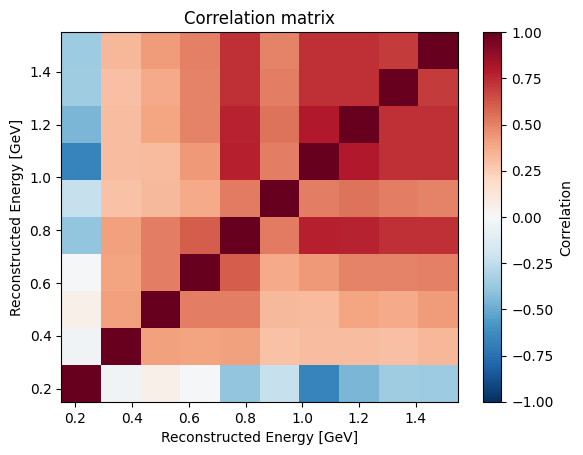

In [33]:
# We can extract channels from the multi-channel histogram by indices or by label.
histogram_no_constraint["NPBDT"].draw_covariance_matrix()

<AxesSubplot:title={'center':'Correlation matrix'}>

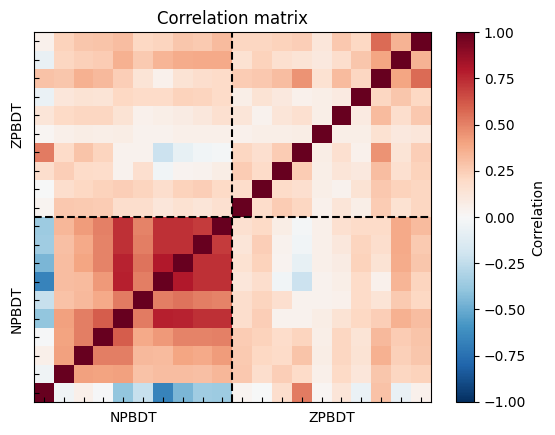

In [34]:
# Passing more than one key will extract the multi-channel histogram for the given channels.
histogram_no_constraint[["NPBDT", "ZPBDT"]].draw_covariance_matrix()

<AxesSubplot:title={'center':'Correlation matrix'}>

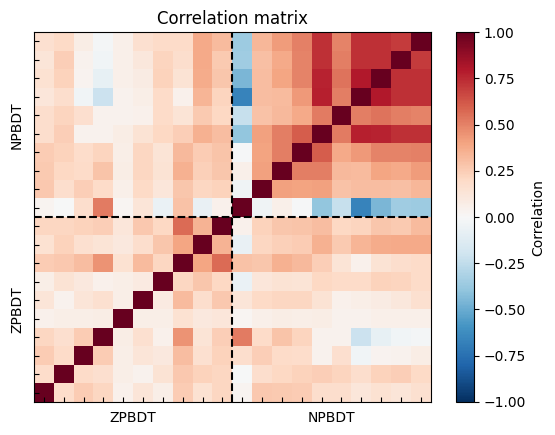

In [35]:
# We can re-arrange a multi-channel histogram easily by passing the keys in the order we want.
# The object internally takes care of moving the entries of the covariance matrix around.
histogram_no_constraint[["ZPBDT", "NPBDT"]].draw_covariance_matrix()

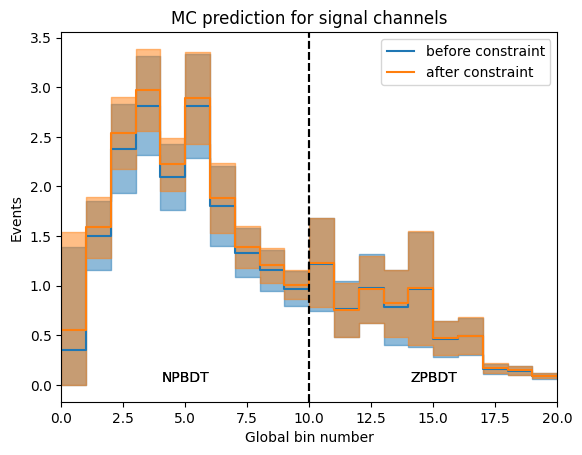

In [36]:
# Let's compare the signal histograms before and after the sideband constraint.
fig, ax = plt.subplots()
histogram_no_constraint[["NPBDT", "ZPBDT"]].draw(ax=ax, label="before constraint", as_errorbars=False)
histogram_with_constraint[["NPBDT", "ZPBDT"]].draw(ax=ax, label="after constraint", as_errorbars=False)
ax.legend()
ax.set_title("MC prediction for signal channels")
plt.show()

(<Figure size 1600x800 with 4 Axes>,
 array([[<AxesSubplot:ylabel='Events'>, <AxesSubplot:ylabel='Events'>],
        [<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Data/MC'>,
         <AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Data/MC'>]],
       dtype=object))

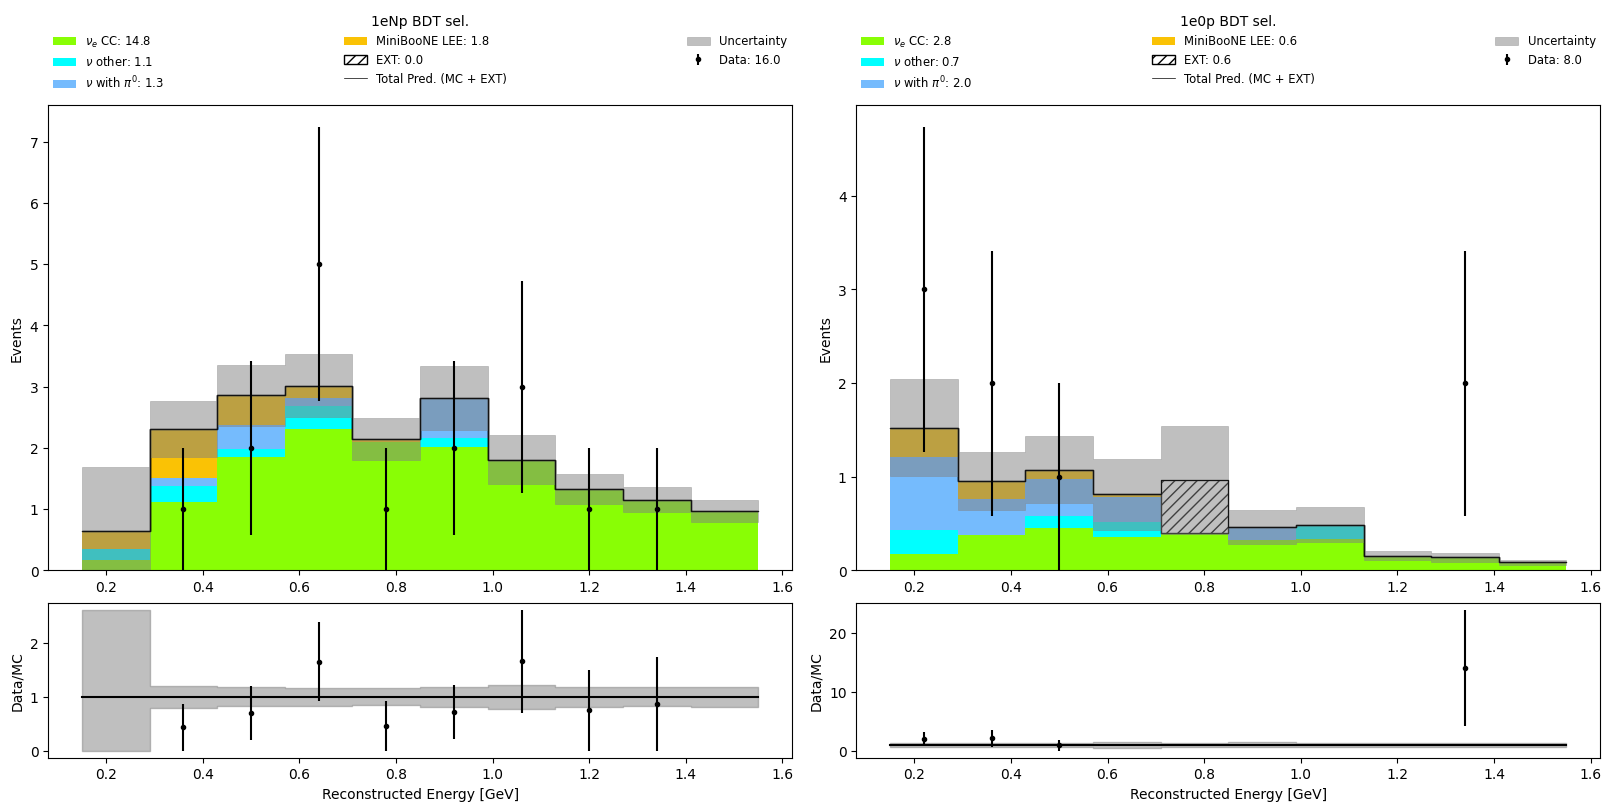

In [37]:
analysis.parameters["signal_strength"].value = 1.0

analysis.plot_signals(
    include_multisim_errors=True,
    add_ext_error_floor=False,
    category_column="paper_category",
    show_data_mc_ratio=True
)

In [38]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

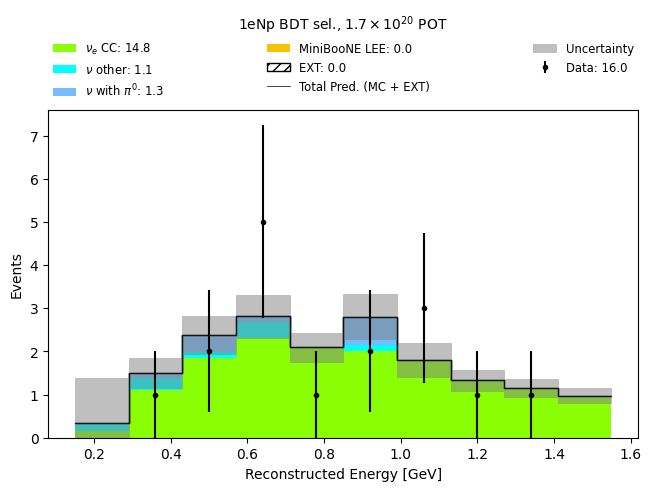

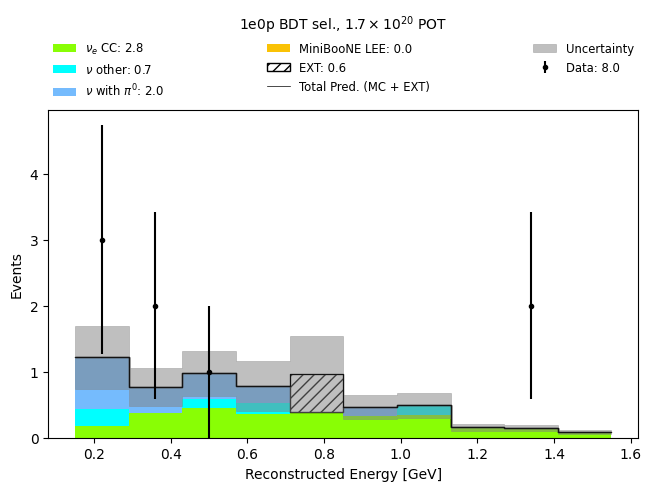

In [39]:
analysis.parameters["signal_strength"].value = 0.0
analysis.plot_signals(
    include_multisim_errors=True,
    add_ext_error_floor=False, category_column="paper_category",
    separate_figures=True
)

(<Figure size 1600x500 with 2 Axes>,
 array([[<AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>,
         <AxesSubplot:xlabel='Reconstructed Energy [GeV]', ylabel='Events'>]],
       dtype=object))

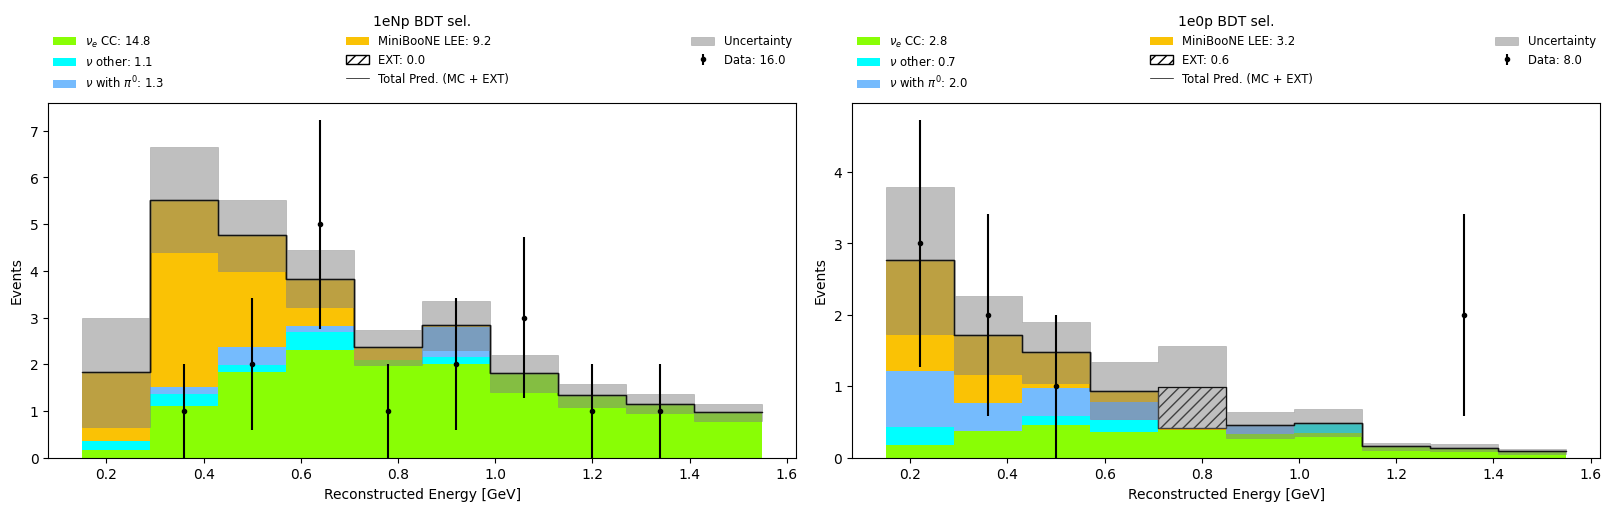

In [40]:
analysis.parameters["signal_strength"].value = 5.0
analysis.plot_signals(
    include_multisim_errors=True, add_ext_error_floor=False, category_column="paper_category"
)

### Run the two-hypothesis test

The analysis defines a function that runs a two-hypothesis test. It will calculate the chi-square for the null hypothesis and the alternative hypothesis for a set number of trials.

In [41]:
# In the past, it used to be possible to scale to some given POT.
# This is no longer possible, because the analysis may use several different signal generators
# That each may have a different POT. It would not be possible to generally scale to a given POT
# in a physically sensible way. 

two_hypo_result = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=1000,
)

In [42]:
two_hypo_result.keys()

dict_keys(['ts_median_h1', 'median_pval', 'samples_h0', 'samples_h1', 'chi2_h0', 'pval_h0', 'chi2_h1', 'pval_h1'])

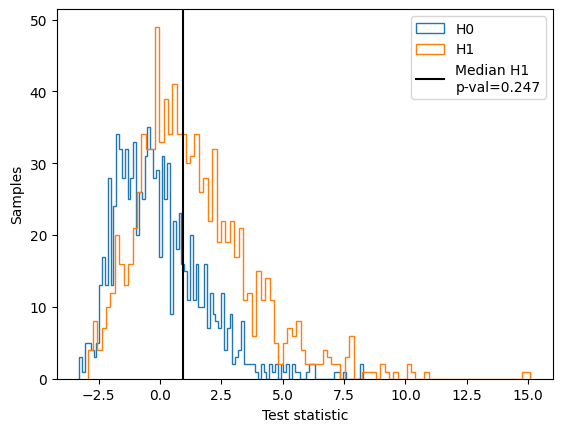

In [43]:
plt.hist(two_hypo_result["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result['median_pval']:.3f}")
plt.legend()
plt.xlabel("Test statistic")
plt.ylabel("Samples")
plt.show()

## Running a parameter fit with MINUIT

Besides the two-hypothesis test, we can also fit the parameters within their bounds by minimizing the chi-square test statistic using MINUIT.

Let's generate some pseudo-data by Poisson-fluctuating the prediction at our excess hypothesis and try to fit it back.

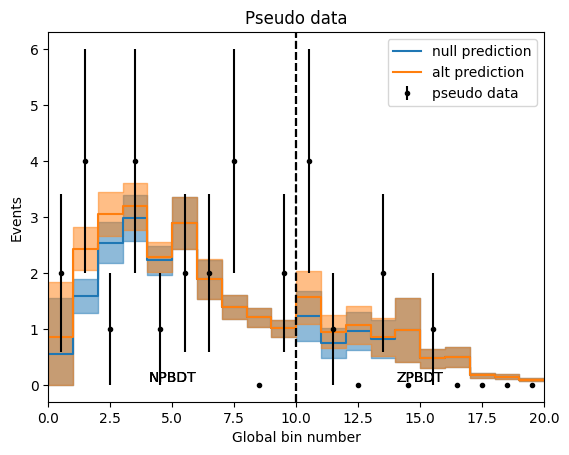

In [44]:
analysis.parameters["signal_strength"].value = 0.0
null_prediction = analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True)
analysis.parameters["signal_strength"].value = 1.0
alt_prediction = analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True)
pseudo_data = alt_prediction.fluctuate_poisson(seed=1)

fig, ax = plt.subplots()
null_prediction.draw(ax=ax, label="null prediction", as_errorbars=False)
alt_prediction.draw(ax=ax, label="alt prediction", as_errorbars=False)
pseudo_data.draw(ax=ax, label="pseudo data", as_errorbars=True, color="black")
ax.legend()
ax.set_title("Pseudo data")
plt.show()

In [45]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

The analysis uses a Minuit object that is also returned after the fit alongside the best fit parameters.

In [46]:
analysis.parameters["signal_strength"].value = 5.0
bfp, m = analysis.fit_to_data(pseudo_data)
m

In [47]:
# These are the best fit parameters
bfp

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	2.2479042413		(0, 10)

In [48]:
m.minos()

return Minos error 

┌──────────┬───────────────────────┐
│          │    signal_strength    │
├──────────┼───────────┬───────────┤
│  Error   │   -1.2    │    1.6    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘

-0.104698  , 0.164433


Because we are using a Minuit object, we can use all the goodies that it provides out of the box, for instance to draw a likelihood scan with uncertainties.

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


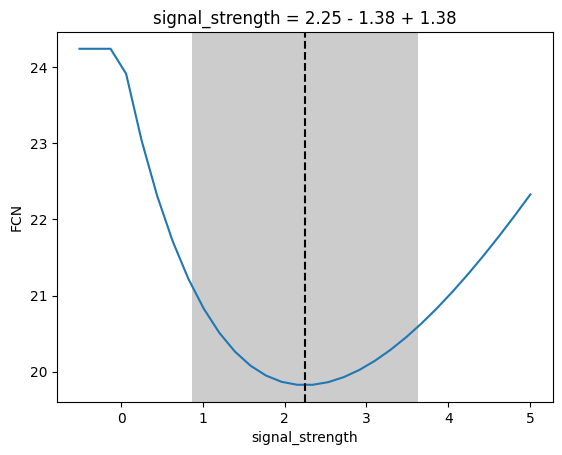

In [49]:
m.draw_mnprofile("signal_strength")
plt.show()

Text(0.5, 1.0, 'Pseudo data fit')

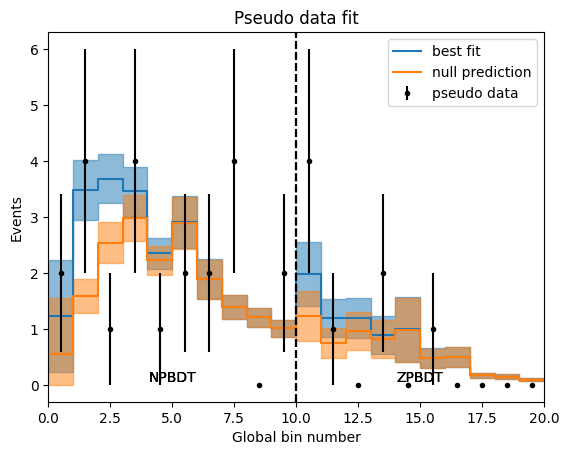

In [50]:
analysis.set_parameters(bfp)
best_fit_hist = analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True)

fig, ax = plt.subplots()
best_fit_hist.draw(ax=ax, label="best fit", as_errorbars=False)
null_prediction.draw(ax=ax, label="null prediction", as_errorbars=False)
# alt_prediction.draw(ax=ax, label="alt prediction", as_errorbars=False)
pseudo_data.draw(ax=ax, label="pseudo data", as_errorbars=True, color="k")
ax.legend()
ax.set_title("Pseudo data fit")
